<a href="https://colab.research.google.com/github/nehemiatejoasa/Pemrograman_Lanjut/blob/master/M_D_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**A. Script**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Definisi**

In [2]:
def rand_exp(x):
    return -(1/x)*np.log(np.random.rand())

**Main Code**

In [3]:
mu=1
lamda=0.8
N=100000
IAT=[0]+[rand_exp(lamda) for i in range(1, N)]
ST=[0]+[1/mu for i in range(1, N)]
JQAT=[0]+np.cumsum(IAT)
GSAT=[0]
LSAT=[0]
TSIS=[0]
TSIQ=[0]
ro=lamda/mu
EN_theory=lamda*((1/mu)+(ro/(2*mu*(1-ro))))

In [4]:
for i in range(1,N):
    if LSAT[i-1]<JQAT[i]:
        GSAT.append(JQAT[i])
    else:
        GSAT.append(LSAT[i-1])
    LSAT.append(ST[i]+GSAT[i])

In [5]:
TSIS=TSIS+(np.array(LSAT)-JQAT)
TSIQ=TSIS-np.array(ST)
TSIS_cumsum=np.cumsum(TSIS)
TSIS_ave=[TSIS_cumsum[i-1]/(i-1) for i in range(1, len(TSIS)+1)]
IAT_cumsum=np.cumsum(IAT)
IAT_ave=[IAT_cumsum[i-1]/(i-1) for i in range(1, len(IAT)+1)]
TQIS=np.array(TSIS)-np.array(ST)
EN=np.array(TSIS_ave)*lamda

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in double_scalars
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in double_scalars
  


In [6]:
data={
    'IAT':IAT,
    'JQAT':JQAT,
    'ST':ST,
    'GSAT':GSAT,
    'LSAT':LSAT,
    'TSIS':TSIS,
    'TSIQ':TSIQ,
    'IAT-ave':IAT_ave,
    'TSIS_ave':TSIS_ave,
    'E[N]':EN
}
df=pd.DataFrame(data=data)
df

,IAT,JQAT,ST,GSAT,LSAT,TSIS,TSIQ,IAT-ave,TSIS_ave,E[N]
0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000e+00,NaN,NaN,NaN
1,0.486448,0.486448,1.0,0.486448,1.486448,1.000000,-1.110223e-16,0.486448,1.000000,0.800000
2,0.374559,0.861007,1.0,1.486448,2.486448,1.625441,6.254407e-01,0.430504,1.312720,1.050176
3,3.771710,4.632717,1.0,4.632717,5.632717,1.000000,0.000000e+00,1.544239,1.208480,0.966784
4,0.845772,5.478489,1.0,5.632717,6.632717,1.154228,1.542278e-01,1.369622,1.194917,0.955934
...,...,...,...,...,...,...,...,...,...,...
99995,2.263609,124730.949473,1.0,124731.493383,124732.493383,1.543910,5.439102e-01,1.247372,3.045920,2.436736
99996,0.088560,124731.038033,1.0,124732.493383,124733.493383,2.455351,1.455351e+00,1.247360,3.045914,2.436732
99997,3.602334,124734.640366,1.0,124734.640366,124735.640366,1.000000,0.000000e+00,1.247384,3.045894,2.436715
99998,1.648158,124736.288524,1.0,124736.288524,124737.288524,1.000000,0.000000e+00,1.247388,3.045874,2.436699


**B. Grafik E[N]**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
No handles with labels found to put in legend.


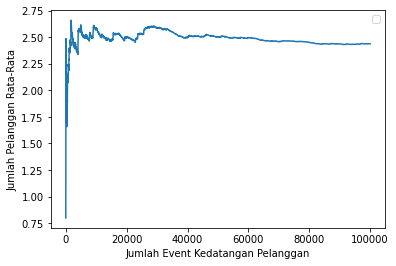

In [7]:
sns.lineplot(df.index,df['E[N]'])
plt.xlabel('Jumlah Event Kedatangan Pelanggan')
plt.ylabel('Jumlah Pelanggan Rata-Rata')
plt.legend()
plt.show()

**C.Grafik Simulasi vs Teori**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


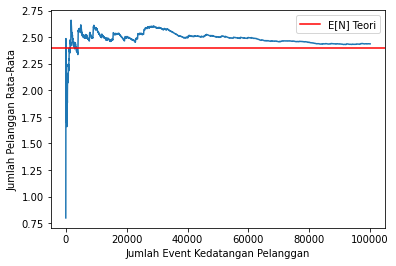

In [8]:
sns.lineplot(df.index,df['E[N]'])
plt.axhline(EN_theory,color='r', label='E[N] Teori')
plt.xlabel('Jumlah Event Kedatangan Pelanggan')
plt.ylabel('Jumlah Pelanggan Rata-Rata')
plt.legend()
plt.show()